In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision
import torch
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

hr = cv2.imread("HR.png")
# plt.imshow(hr)

### define the upper and lower boundaries of the HSV pixel
### intensities to be considered 'skin'

<br />

### apply a series of erosions and dilations to the mask
### using an elliptical kernel


<br />

### blur the mask to help remove noise, then apply the
### mask to the frame

<br />

### show the skin in the image along with the mask
 ### cv2.imshow("images", np.hstack([frame, skin]))

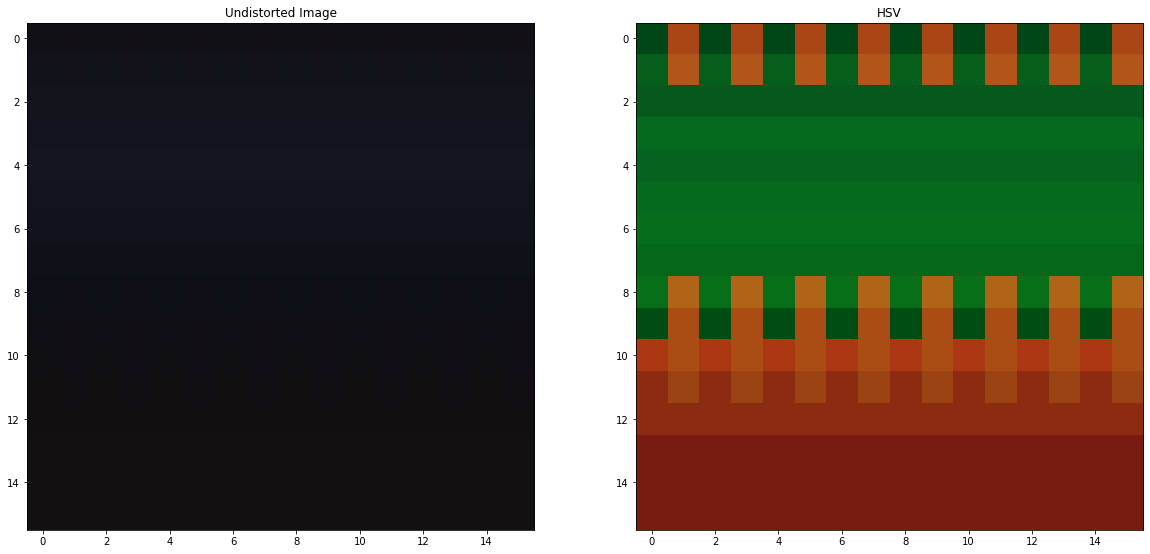

In [25]:
frame = cv2.imread("110.jpg")
h,w,c = frame.shape
h = int(h/2); w = int(w/2)

frame = frame[h-105:h+150, w-105:w+150, :]
# frame = cv2.resize(frame, 
#                        (128,128), # set fx and fy, not the final size
# #                        fx=0.2, 
# #                        fy=0.2, 
#                        interpolation=cv2.INTER_NEAREST)
_, xx = plt.subplots(1,2, figsize=(20, 10))
xx[0].set_title('Undistorted Image')
xx[0].imshow(frame)
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 30, 90], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

xx[1].set_title('HSV')
xx[1].imshow(converted)

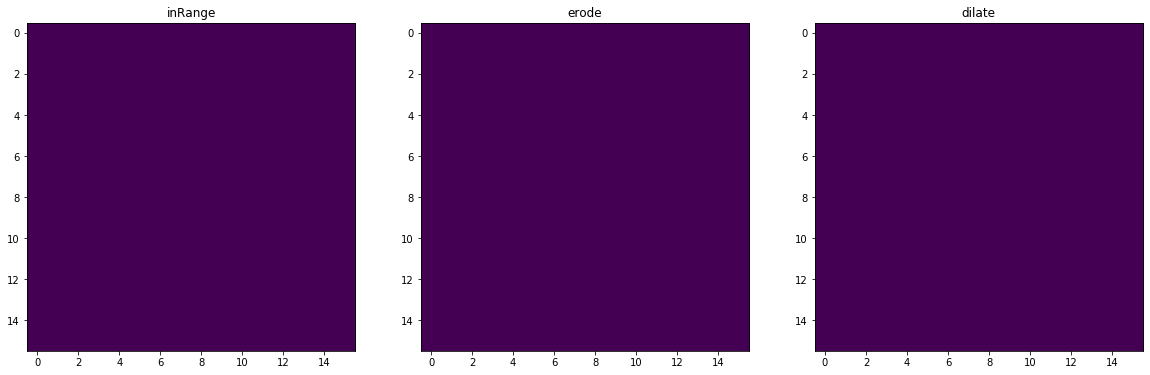

In [26]:
skinMask = cv2.inRange(converted, lower, upper)
_, xx = plt.subplots(1,3, figsize=(20, 10))
xx[0].set_title('inRange')
xx[0].imshow(skinMask)
	# apply a series of erosions and dilations to the mask
	# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
        #
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
xx[1].set_title('erode')
xx[1].imshow(skinMask)
        
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
xx[2].set_title('dilate')
xx[2].imshow(skinMask)
h,w = skinMask.shape
h = int(h/2); w = int(w/2)
# roi = skinMask[ h-150:h+150, w-150:w+150]

# # define your_kernel as needed
# skinMask = cv2.dilate(roi, kernel, iterations=2) # the [:] is important
# xx[3].set_title('ROI')
# xx[3].imshow(frame[h-175:h+150, w-175:w+150, :])
# xx[4].set_title('ROI dilate')
# xx[4].imshow(skinMask)


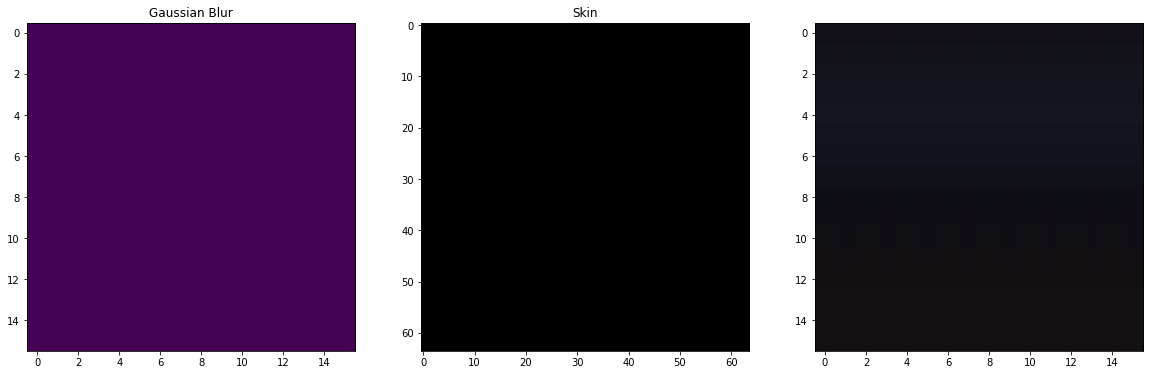

In [27]:
_, xx = plt.subplots(1,3, figsize=(20, 10))
	# blur the mask to help remove noise, then apply the
	# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
xx[0].set_title('Gaussian Blur')
xx[0].imshow(skinMask)
        #
skin = cv2.bitwise_and(frame, frame, mask = skinMask)
xx[1].set_title('Skin')
cv2.imwrite( "orig.png",skin)
        # show the skin in the image along with the mask
small_img = cv2.resize(skin, 
                       (64,64), # set fx and fy, not the final size
#                        fx=0.2, 
#                        fy=0.2, 
                       interpolation=cv2.INTER_NEAREST)
xx[1].imshow(small_img)
cv2.imwrite("downsample.png",small_img)
skin = cv2.bitwise_not(frame, frame, mask = skinMask)
xx[2].imshow(skin)